#Logistic Regression



# Classification: Linear vs Logistic Regression  

In many real-world problems, the goal is not to predict a continuous value, but to classify an outcome into categories.  
Examples include:  
- **Fraud detection**: Is this credit card transaction fraudulent or not?  
- **Medical diagnosis**: Is this tumor malignant or benign?  

Both of these are **binary classification problems**, where the output variable can only take two values:  
- `0` → No / Negative  
- `1` → Yes / Positive  

---

## Why Not Linear Regression for Classification?  

At first glance, we might try using **Linear Regression**:  

\[
\hat{y} = w x + b
\]

and then apply a threshold (e.g., 0.5) to classify.  

However, this approach has several **problems**:  
1. **Unbounded outputs** → Linear regression can predict values < 0 or > 1, which don’t make sense as probabilities.  
2. **Poor decision boundary** → Outliers in the data can shift the regression line, leading to misclassification.  
3. **Non-linearity in data** → Linear regression assumes a straight-line relationship, which doesn’t always separate classes well.  

---

## Logistic Regression to the Rescue  

Instead, we use **Logistic Regression**, which models the probability that the output belongs to class `1`.  

It applies the **sigmoid function** to the linear output

This has several advantages:  
- Outputs are always between **0 and 1** (valid probabilities).  
- Decision boundary is more stable against outliers.  

---

So in short:

- Linear Regression is **not suitable** for classification tasks.  
- Logistic Regression is specifically designed for binary classification, giving us a **probability-based and robust** way to separate classes.  



Let's look at an example where we can use Linear Regression for Classification instead of Logistic Regression

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving plt_quad_logistic.py to plt_quad_logistic.py
User uploaded file "plt_quad_logistic.py" with length 13008 bytes


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_common import dlc, plot_data, sigmoid
from plt_one_addpt_onclick import plt_one_addpt_onclick
from plt_logistic_loss import  plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example
from plt_logistic_loss import soup_bowl, plt_logistic_squared_error
from plt_quad_logistic import plt_quad_logistic, plt_prob

import copy
plt.style.use('./deeplearning.mplstyle')

In [ ]:
#one-variable
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

#two-variables
X_train2 = np.array([[0.50, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])

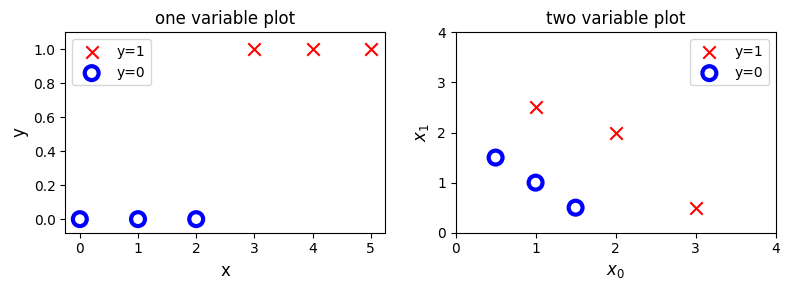

In [ ]:
pos = y_train == 1
neg = y_train == 0

fig, ax = plt.subplots(1,2,figsize=(8,3))

ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, label='y=1', color = 'red')
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label='y=0', facecolors = 'none', edgecolors = 'blue', lw = 3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

ax[1].scatter(X_train2[pos,0], X_train2[pos,1], marker='x', s=80, label='y=1', color = 'red')
ax[1].scatter(X_train2[neg,0], X_train2[neg,1], s=100, marker = 'o', label='y=0', facecolors = 'none', edgecolors = 'blue', lw = 3)
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()


plt.show()

Note in the plots above:
- In the single variable plot, positive results are shown both a red 'X's and as y=1. Negative results are blue 'O's and are located at y=0.
   - But in the case of linear regression, y would not have been limited to two values but could have been any value.
- In the two-variable plot, the y axis is not available.  Positive results are shown as red 'X's, while negative results use the blue 'O' symbol.
    - But in the case of linear regression with multiple variables, y would not have been limited to two values and a similar plot would have been three-dimensional.

In [ ]:
w_in = np.zeros((1))
b_in = 0
plt.close('all')

In [ ]:
#addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False)

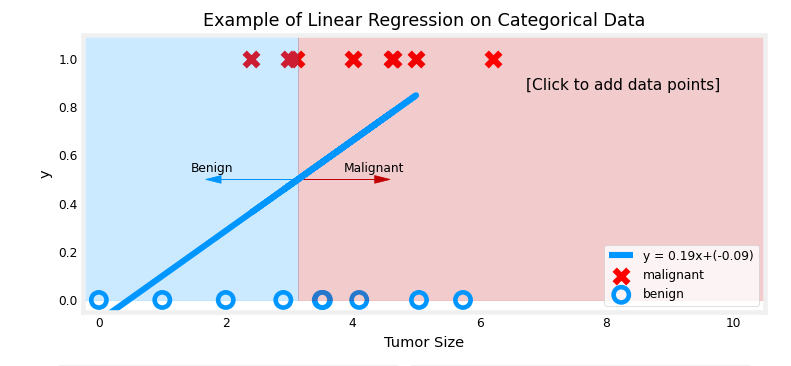

As more outliers are added, the line of best fit in linear regression adjusts to minimize the overall error, often shifting toward the outliers. In categorical data, this can cause some points to fall on the "wrong" side of the line, leading to misclassification. This limitation shows why linear regression is not ideal for classification problems. Logistic regression is preferred in such cases because it models probabilities between 0 and 1, providing a natural separation between classes and reducing misclassification.


##Logistic Regression

We would like the predictions of our classification model to be between 0 and 1 since our output variable  𝑦
  is either 0 or 1.
This can be accomplished by using a "sigmoid function" which maps all input values to values between 0 and 1.


### Formula for Sigmoid function

The formula for a sigmoid function is as follows -  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In the case of logistic regression, z (the input to the sigmoid function), is the output of a linear regression model.
- In the case of a single example, $z$ is scalar.
- in the case of multiple examples, $z$ may be a vector consisting of $m$ values, one for each example.
- The implementation of the sigmoid function should cover both of these potential input formats.


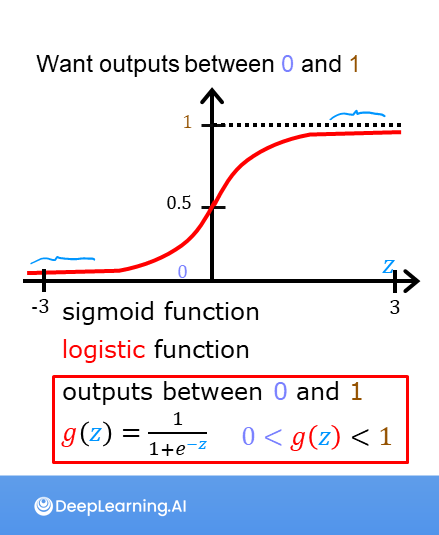

Now lets us use Logistic Regression for the same problem and see how it works

## Logistic Regression
A logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{2} $$

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{3}$

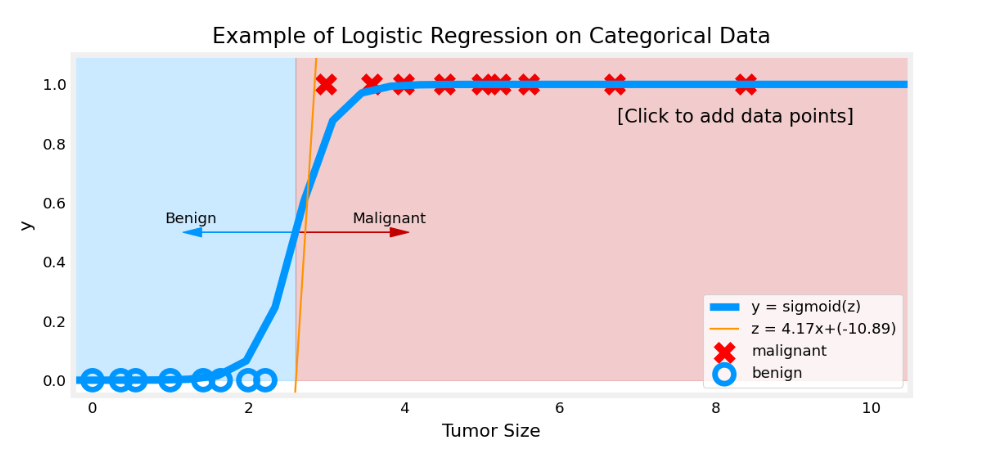

# Linear Regression vs Logistic Regression: Gradient Descent Motivation

## 1. Linear Regression
**Goal:** Predict a continuous target \(y\).

**Model:**
$$ \hat{y} = w x + b $$

**Cost Function (Mean Squared Error):**
$$ J(w, b) = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2 $$

**Gradient Descent Updates:**
$$ w \gets w - \alpha \frac{\partial J}{\partial w}, \quad b \gets b - \alpha \frac{\partial J}{\partial b} $$

**Motivation:** Minimize the squared error between predicted and actual values.

* * *

## 2. Logistic Regression
**Goal:** Predict a binary class (0 or 1).

**Model (Sigmoid):**
$$ \hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}, \quad z_i = w x_i + b $$

**Cost Function (Binary Cross-Entropy / Log Loss):**
$$ J(w, b) = - \frac{1}{m} \sum_{i=1}^{m} \Big[ y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \Big] $$

**Gradients:**
$$ \frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) x_i, \quad \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i) $$

**Gradient Descent Updates:**
$$ w \gets w - \alpha \frac{\partial J}{\partial w}, \quad b \gets b - \alpha \frac{\partial J}{\partial b} $$

**Decision Boundary:** After training, classify as 1 if $\hat{y}_i \ge 0.5$, else 0.

* * *

**Summary:**
- Linear regression: minimize **squared error** for continuous outputs.
- Logistic regression: minimize **log loss** for probability outputs.
- Both use gradient descent; the key difference is **cost function** and **model output (linear vs sigmoid)**.

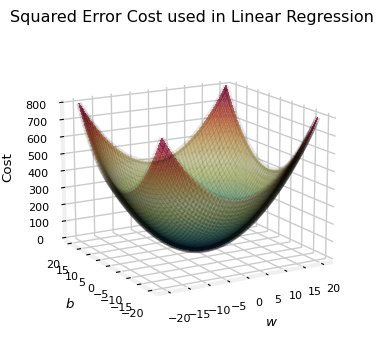

In [ ]:
soup_bowl()

This cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, $f_{wb}(x)$ now has a non-linear component, the sigmoid function:   $f_{w,b}(x^{(i)}) = sigmoid(wx^{(i)} + b )$.   Trying a squared error cost on the example, now including the sigmoid.

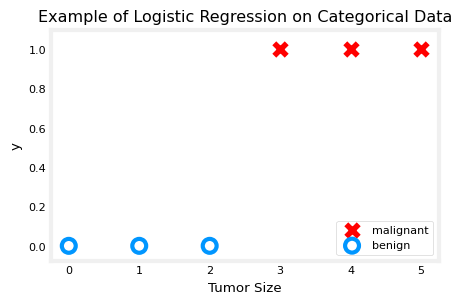

In [ ]:
plt_simple_example(x_train, y_train)

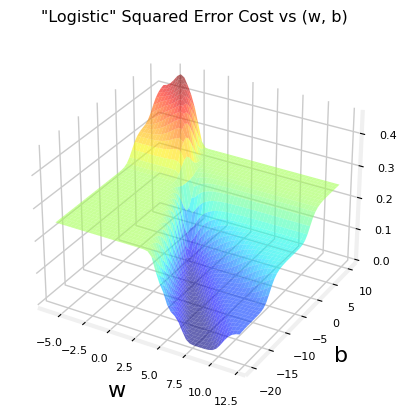

In [ ]:
plt.close('all')
plt_logistic_squared_error(x_train,y_train)
plt.show()

While this produces a pretty interesting plot, the surface above not nearly as smooth as the 'soup bowl' from linear regression!    

Logistic regression requires a cost function more suitable to its non-linear nature. This starts with a Loss function.

##Model

**Model (Sigmoid):**
$$ \hat{y}_i = \sigma(z_i) = \frac{1}{1 + e^{-z_i}}, \quad z_i = w x_i + b $$

##Loss Function

Logistic Regression uses a loss function more suited to the task of categorization where the target is 0 or 1 rather than any number.

**Loss** is a measure of the difference of a single example to its target value while the  
**Cost** is a measure of the losses over the training set


This is defined:
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}


*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value.

*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$ where function $g$ is the sigmoid function.


The defining feature of this loss function is the fact that it uses two separate curves. One for the case when the target is zero or ($y=0$) and another for when the target is one ($y=1$). Combined, these curves provide the behavior useful for a loss function, namely, being zero when the prediction matches the target and rapidly increasing in value as the prediction differs from the target. Consider the curves below:

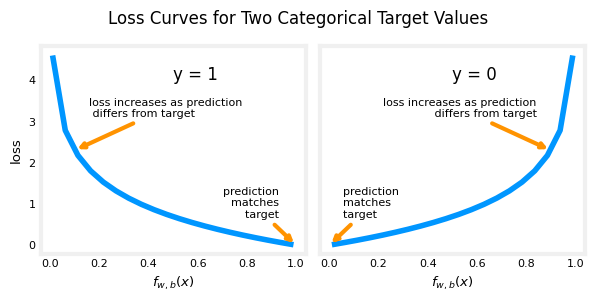

In [ ]:
plt_two_logistic_loss_curves()

Combined, the curves are similar to the quadratic curve of the squared error loss. The x-axis is $f_{\mathbf{w},b}$ which is the output of a sigmoid. The sigmoid output is strictly between 0 and 1.



The loss function above can be rewritten to be easier to implement.
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
  
This is a rather formidable-looking equation. It is less daunting when you consider $y^{(i)}$ can have only two values, 0 and 1. One can then consider the equation in two pieces:  
when $ y^{(i)} = 0$, the left-hand term is eliminated:
$$
\begin{align}
loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 0) &= (-(0) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 0\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\
&= -\log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$
and when $ y^{(i)} = 1$, the right-hand term is eliminated:
$$
\begin{align}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), 1) &=  (-(1) \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - 1\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)\\
  &=  -\log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)
\end{align}
$$

With this new logistic loss function, a cost function can be produced that incorporates the loss from all the examples. Let's take a look at the cost vs parameters curve for the simple example we considered above:

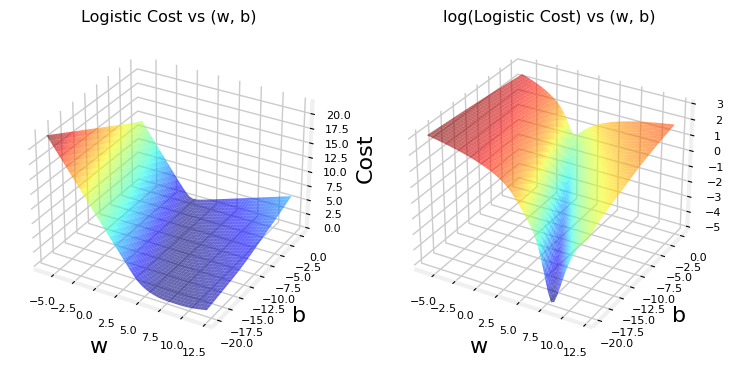

In [ ]:
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)

This curve is well suited to gradient descent! It does not have plateaus, local minima, or discontinuities. It is not a bowl as in the case of squared error. Both the cost and the log of the cost are plotted to illuminate the fact that the curve, when the cost is small, has a slope and continues to decline.

##Cost Function

The cost function for Logistic Regression is of the form

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5}
\end{align}
$$


The algorithm for `compute_cost_logistic` loops over all the examples calculating the loss for each example and accumulating the total.

The variables X and y are not scalar values but matrices of shape ($m, n$) and ($𝑚$,) respectively, where  $𝑛$ is the number of features and $𝑚$ is the number of training examples.


In [ ]:
def sigmoid(z):

  return 1 / (1 + np.exp(-z))

In [ ]:
def compute_cost_logistic(X, y, w, b):

  m = X.shape[0]
  cost = 0.0
  for i in range(m):
   z_i = np.dot(X[i], w) + b
   f_wb_i = sigmoid(z_i)
   cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1-f_wb_i)

  cost = cost / m
  return cost

In [ ]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train2, y_train2, w_tmp, b_tmp))

0.36686678640551745


##Logistic Gradient Descent

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where each iteration performs simultaneous updates on $w_j$ for all $j$, where
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align*}$$

* m is the number of training examples in the data set      
* $f_{\mathbf{w},b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target
* For a logistic regression model  
    $z = \mathbf{w} \cdot \mathbf{x} + b$  
    $f_{\mathbf{w},b}(x) = g(z)$  
    where $g(z)$ is the sigmoid function:  
    $g(z) = \frac{1}{1+e^{-z}}$   
    

In [ ]:
def compute_gradient_logistic(X, y, w, b):

  m, n = X.shape
  dj_dw = np.zeros((n,))
  dj_db = 0.

  for i in range(m):
    f_wb_i = sigmoid(np.dot(X[i], w) + b)
    err_i = f_wb_i - y[i]
    for j in range(n):
      dj_dw[j] += err_i * X[i,j]
    dj_db += err_i
  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_db, dj_dw

In [ ]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iter):

  J_history = []
  w = copy.deepcopy(w_in)
  b = b_in

  for i in range(num_iter):

    dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)

    w = w - alpha * dj_dw
    b = b - alpha * dj_db

    if i < 100000:
      J_history.append(compute_cost_logistic(X,y,w,b))

    if i% math.ceil(num_iter / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")

  return w, b, J_history


In [ ]:
import math
w_tmp  = np.zeros_like(X_train2[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train2, y_train2, w_tmp, b_tmp, alph, iters)
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28 5.08], b:-14.222409982019837


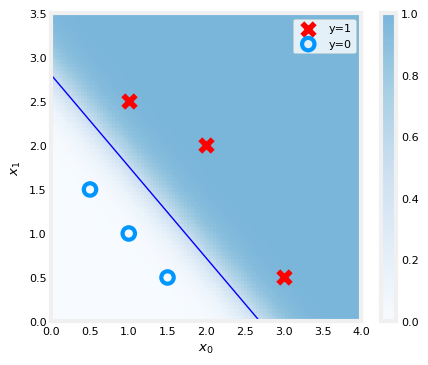

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(5,4))

plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')
ax.axis([0, 4, 0, 3.5])
plot_data(X_train2, y_train2, ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0], [x1,0], c='blue', lw = 1)
plt.show()

In the plot above:
 - the shading reflects the probability y=1 (result prior to decision boundary)
 - the decision boundary is the line at which the probability = 0.5


##Logistic Regression with Scikit-learn Library

In [ ]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

##Fit Model

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

##Make Predictions

In [ ]:
y_pred = model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


#Accuracy

In [ ]:
print("Accuracy on training set:", model.score(X, y))

Accuracy on training set: 1.0


### Conclusion
When implementing Logistic Regression, we have two approaches:

- **Manual (with Gradient Descent):** We explicitly define the cost function, compute gradients, and update parameters step by step.  
- **Using Scikit-learn:** The `LogisticRegression` class already includes optimization solvers that automatically minimize the cost function and find the best parameters.

 Therefore, with **scikit-learn we don’t need to perform gradient descent manually**, as it is already handled internally.
